In [ ]:
#Import pckgs

# Modules we'll use
import pandas as pd
import numpy as np

# For min_max scaling
from sklearn.preprocessing import MinMaxScaler

# For z-score scaling
from sklearn.preprocessing import StandardScaler

# For Box-Cox Normalization
from scipy import stats

# For Label Encoding
from sklearn import preprocessing
# Plotting modules
from pandas.plotting import scatter_matrix
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


## DATASET1 >> heart_disease_health_indicators

In [ ]:
df = pd.read_csv("heart_disease.csv")

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.columns,df.columns.size

(Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
        'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
        'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
        'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
        'Income'],
       dtype='object'), 22)

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df.isnull().mean()*100

HeartDiseaseorAttack    0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
Diabetes                0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

In [ ]:
rowMissing = df[df["Sex"].isnull()][["MentHlth","PhysHlth","DiffWalk","Age","Education","Income"]]
rowMissing

,MentHlth,PhysHlth,DiffWalk,Age,Education,Income


In [ ]:
index = rowMissing.index
index

Int64Index([], dtype='int64')

In [ ]:
df.drop(axis=0,index=index,inplace=True)

In [ ]:
df.isnull().mean()*100

HeartDiseaseorAttack    0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
Diabetes                0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64

In [ ]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
df.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [ ]:
df_describe= df.describe()
df_describe

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [ ]:
df.corr()['HeartDiseaseorAttack'].sort_values()

Income                 -0.141011
Education              -0.099600
PhysActivity           -0.087299
Veggies                -0.039167
HvyAlcoholConsump      -0.028991
Fruits                 -0.019790
AnyHealthcare           0.018734
NoDocbcCost             0.031000
CholCheck               0.044206
BMI                     0.052904
MentHlth                0.064621
Sex                     0.086096
Smoker                  0.114441
Diabetes                0.180272
HighChol                0.180765
PhysHlth                0.181698
Stroke                  0.203002
HighBP                  0.209361
DiffWalk                0.212709
Age                     0.221618
GenHlth                 0.258383
HeartDiseaseorAttack    1.000000
Name: HeartDiseaseorAttack, dtype: float64

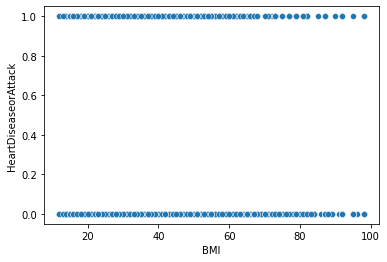

In [ ]:
sns.scatterplot(x='BMI',y='HeartDiseaseorAttack',data=df)

In [ ]:
columnsOutliers =[]
for col in df.columns:
 if(df[col].max()>1):
   columnsOutliers.append(col)

In [ ]:
columnsOutliers

['BMI',
 'Diabetes',
 'GenHlth',
 'MentHlth',
 'PhysHlth',
 'Age',
 'Education',
 'Income']

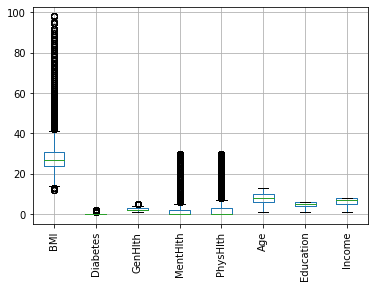

In [ ]:
df.boxplot(column=columnsOutliers,rot=90)

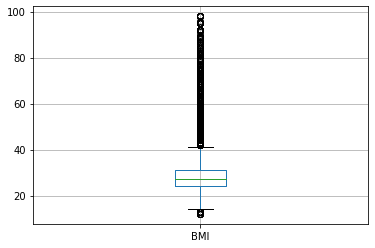

In [ ]:
df.boxplot(column="BMI")

In [ ]:
col =columnsOutliers
for c in col:
  print("\n",c)
  IQ = df_describe[c].loc["75%"]-df_describe[c].loc["25%"]
  print("IQ",IQ)
  box_median = df_describe[c].loc["50%"]
  box_left = df_describe[c].loc["25%"] - 3*IQ if (df_describe[c].loc["25%"] - 3*IQ < df_describe[c].loc["min"] ) else df_describe[c].loc["min"]
  box_right = df_describe[c].loc["75%"] + 3*IQ if (df_describe[c].loc["75%"] + 3*IQ < df_describe[c].loc["max"] ) else df_describe[c].loc["max"]
  print("percentage",((df[c] >box_right) | (df[c] <box_left)).mean()*100)

  # inx = (df[(df[c] >box_right) | (df[c] <box_left)].index).to_list()
  # print("index before ",inx)
  # print(df.loc[inx][c])
  # df.loc[inx,c] = box_median
  # print(box_median)
  # inx = df[(df[c] >box_right) | (df[c] <box_left)].index.to_list()
  # print("index after ",inx)
  # print(df.loc[inx][c])


 BMI
IQ 7.0
percentage 0.6728949858088931

 Diabetes
IQ 0.0
percentage 15.758830022075054

 GenHlth
IQ 1.0
percentage 0.0

 MentHlth
IQ 2.0
percentage 12.409728792179124

 PhysHlth
IQ 3.0
percentage 13.295490381583097

 Age
IQ 4.0
percentage 0.0

 Education
IQ 2.0
percentage 0.0

 Income
IQ 3.0
percentage 0.0


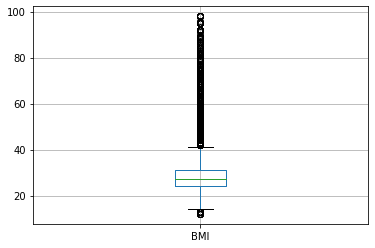

In [ ]:
df.boxplot(column="BMI")

In [ ]:
q75,q25=np.percentile(df["BMI"],[75,25])
print(q75,q25);
iqr=q75-q25
lower_limit=q25-1.5*(iqr)
upper_limit=q75-1.5*(iqr)
df[df["BMI"] > lower_limit]
df[df["BMI"] > upper_limit]

31.0 24.0


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


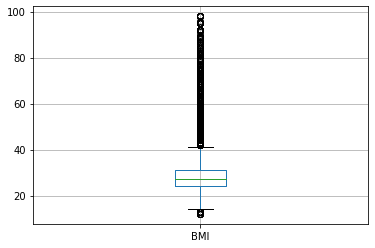

In [ ]:
df.boxplot(column="BMI")

In [ ]:
for col in df.columns:
  q75,q25=np.percentile(df[col],[75,25])
  print(q75,q25);
  iqr=q75-q25
  lower_limit=q25-1.5*(iqr)
  upper_limit=q75-1.5*(iqr)
  df[df[col] > lower_limit]
  df[df[col] > upper_limit]

0.0 0.0
1.0 0.0
1.0 0.0
1.0 1.0
31.0 24.0
1.0 0.0
0.0 0.0
0.0 0.0
1.0 1.0
1.0 0.0
1.0 1.0
0.0 0.0
1.0 1.0
0.0 0.0
3.0 2.0
2.0 0.0
3.0 0.0
0.0 0.0
1.0 0.0
10.0 6.0
6.0 4.0
8.0 5.0


In [ ]:
df.shape

(253680, 22)

It seems that there is no outliers as the percentage is high so they are not outliers

*knn*

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']


In [ ]:
df[columnsOutliers] = MinMaxScaler().fit_transform(df[columnsOutliers])
df[columnsOutliers].describe()

,BMI,Diabetes,GenHlth,MentHlth,PhysHlth,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.190493,0.148461,0.377848,0.106159,0.141403,0.586010,0.810087,0.721982
std,0.076845,0.349080,0.267119,0.247095,0.290598,0.254518,0.197155,0.295878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.139535,0.000000,0.250000,0.000000,0.000000,0.416667,0.600000,0.571429
50%,0.174419,0.000000,0.250000,0.000000,0.000000,0.583333,0.800000,0.857143
75%,0.220930,0.000000,0.500000,0.066667,0.100000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
df.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,0.190493,0.443169,0.040571,0.148461,0.756544,0.634256,...,0.951053,0.084177,0.377848,0.106159,0.141403,0.168224,0.440342,0.586010,0.810087,0.721982
std,0.292087,0.494934,0.494210,0.189571,0.076845,0.496761,0.197294,0.349080,0.429169,0.481639,...,0.215759,0.277654,0.267119,0.247095,0.290598,0.374066,0.496429,0.254518,0.197155,0.295878
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.139535,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.416667,0.600000,0.571429
50%,0.000000,0.000000,0.000000,1.000000,0.174419,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.583333,0.800000,0.857143
75%,0.000000,1.000000,1.000000,1.000000,0.220930,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.500000,0.066667,0.100000,0.000000,1.000000,0.750000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df["HeartDiseaseorAttack"].value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

So there are not even weight so we shouldn't use the accuracy to compare between the different k valuesa nd use the F1_score

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train,y_train)
y_pred_test = knn_model.predict(X_test)

report = classification_report(y_test,y_pred_test)
print(report)

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1065
         1.0       0.18      0.04      0.06       104

    accuracy                           0.90      1169
   macro avg       0.55      0.51      0.51      1169
weighted avg       0.85      0.90      0.87      1169



In [ ]:
test_F1Rates_forClass0 = []
test_F1Rates_forClass1 = []
test_accuracy = []

for k in range(1,21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)

    y_pred_test = knn_model.predict(X_test)
    # report = classification_report(y_test,y_pred_test)

    # print(type(report))
    # df_classification_report = pd.DataFrame(report)
  #  df_classification_report.head()
    f1_scores = f1_score(y_test, y_pred_test, average=None) #f1_score(y_true, y_pred, average=None)


   # test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_F1Rates_forClass1.append( f1_scores[1])
    test_F1Rates_forClass0.append( f1_scores[0])
    test_accuracy.append(accuracy_score(y_test,y_pred_test))

KeyboardInterrupt: ignored

Text(0.5, 0, 'K Value')

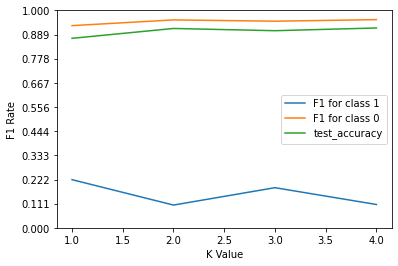

In [ ]:
#plt.figure(figsize=(5,3),dpi=200)(
plt.plot(range(1,5),test_F1Rates_forClass1[0:4:1],label='F1 for class 1')
plt.plot(range(1,5),test_F1Rates_forClass0[0:4:1],label='F1 for class 0')
plt.plot(range(1,5),test_accuracy[0:4:1],label='test_accuracy')

# plt.ylim(0.9)
plt.yticks(np.linspace(0,1,10))

plt.legend()
plt.ylabel('F1 Rate')
plt.xlabel("K Value")

**The best K will be chosed according to the F! score of class 1 as for class 0 the change is so small, we will not use the accuracy as our dataset is not balanced.**

**The best K is = 1**

*SVM*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
X = df.drop('HeartDiseaseorAttack',axis=1)
y = df['HeartDiseaseorAttack']
df.shape

(253680, 22)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train);
X_train=scaler.transform(X_train);
X_test=scaler.transform(X_test);

In [ ]:
model=SVC(kernel='linear');
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


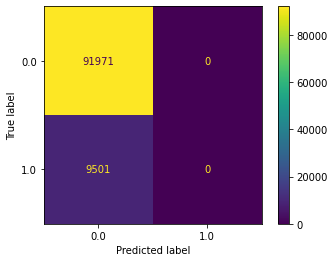

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

In [ ]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.9063682592242195
0.0
0.0
0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model4=SVC(kernel="poly")
model4.fit(X_train,y_train)
y_pred_m4 = model4.predict(X_test)


In [ ]:
print(accuracy_score(y_test,y_pred_m4))
print(precision_score(y_test,y_pred_m4))
print(recall_score(y_test,y_pred_m4))
print(f1_score(y_test,y_pred_m4))

In [ ]:
model3=SVC(kernel="sigmoid")
model3.fit(X_train,y_train)
y_pred_m3 = model3.predict(X_test)
print(accuracy_score(y_test,y_pred_m3))
print(precision_score(y_test,y_pred_m3))
print(recall_score(y_test,y_pred_m3))
print(f1_score(y_test,y_pred_m3))

0.8734922594738341
0.2253012048192771
0.2134703196347032
0.21922626025791325


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


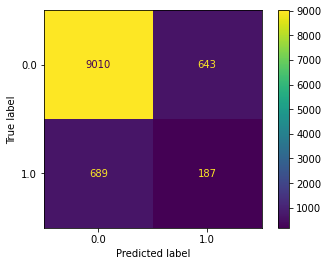

In [ ]:
plot_confusion_matrix(model3,X_test,y_test)

## DATASET2 >> Income

In [ ]:
df_train = pd.read_csv("income_train.csv")
df_test = pd.read_csv("test.csv")

In [ ]:
df_train.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


In [ ]:
# df_test.head()

In [ ]:
df_train.columns,df_train.columns.size

(Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'income_>50K'],
       dtype='object'), 15)

In [ ]:
df_train.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
(df_train.isnull().mean()*100 ).sort_values()

age                0.000000
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
income_>50K        0.000000
native-country     1.735787
workclass          5.682826
occupation         5.701026
dtype: float64

In [ ]:
rowMissing = df_train[df_train["native-country"].isnull()][["workclass","occupation"]]
rowMissing

,workclass,occupation
72,Local-gov,Craft-repair
119,Private,Other-service
203,Private,Sales
213,Self-emp-not-inc,Sales
371,Private,Sales
...,...,...
43851,Self-emp-not-inc,Exec-managerial
43852,Private,Exec-managerial
43872,Private,Handlers-cleaners
43880,Self-emp-inc,Machine-op-inspct


In [ ]:
rowMissing_native_country = df_train[df_train["native-country"].isnull()]
rowMissing_native_country

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
72,53,Local-gov,228723,HS-grad,9,Divorced,Craft-repair,Not-in-family,Other,Male,0,0,40,NaN,1
119,29,Private,113870,1st-4th,2,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,NaN,0
203,66,Private,73522,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,NaN,0
213,36,Self-emp-not-inc,160120,Bachelors,13,Married-civ-spouse,Sales,Husband,Other,Male,0,0,45,NaN,0
371,55,Private,380357,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43851,45,Self-emp-not-inc,163559,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,Asian-Pac-Islander,Female,0,0,48,NaN,0
43852,23,Private,216672,Bachelors,13,Never-married,Exec-managerial,Own-child,White,Male,0,0,30,NaN,0
43872,29,Private,144259,Bachelors,13,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,4386,0,80,NaN,1
43880,54,Self-emp-inc,304570,Bachelors,13,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,7688,0,40,NaN,1


In [ ]:
df_train.groupby("native-country")["race"].value_counts().sort_values()

native-country  race              
Guatemala       Asian-Pac-Islander        1
South           Other                     1
                Black                     1
France          Asian-Pac-Islander        1
                Black                     1
                                      ...  
United-States   Asian-Pac-Islander      392
                Amer-Indian-Eskimo      404
Mexico          White                   806
United-States   Black                  3844
                White                 34612
Name: race, Length: 121, dtype: int64

In [ ]:
native_countries = df_train["native-country"].value_counts()
native_countries

United-States                 39429
Mexico                          880
Philippines                     273
Germany                         188
Puerto-Rico                     167
Canada                          158
El-Salvador                     145
India                           134
Cuba                            124
China                           113
England                         109
South                           105
Dominican-Republic               97
Jamaica                          97
Italy                            94
Japan                            83
Guatemala                        79
Vietnam                          77
Columbia                         75
Poland                           72
Haiti                            71
Portugal                         59
Taiwan                           58
Iran                             52
Nicaragua                        46
Greece                           44
Ecuador                          42
Peru                        

In [ ]:
mode = df_train["native-country"].mode()[0]
mode

'United-States'

In [ ]:
# df_train["native-country"].fillna(mode)

In [ ]:
df_train["native-country"].unique()

array(['United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
       'Ecuador', 'England', 'Philippines', 'China', 'Germany', nan,
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Taiwan', 'France',
       'Trinadad&Tobago', 'Laos', 'Hungary', 'Honduras', 'Hong',
       'Holand-Netherlands'], dtype=object)

In [ ]:
values = {"native-country": mode}
df_train.fillna(value=values,inplace=True)
values

{'native-country': 'United-States'}

In [ ]:
df_train["native-country"].unique()

array(['United-States', 'Japan', 'South', 'Portugal', 'Italy', 'Mexico',
       'Ecuador', 'England', 'Philippines', 'China', 'Germany',
       'Dominican-Republic', 'Jamaica', 'Vietnam', 'Thailand',
       'Puerto-Rico', 'Cuba', 'India', 'Cambodia', 'Yugoslavia', 'Iran',
       'El-Salvador', 'Poland', 'Greece', 'Ireland', 'Canada',
       'Guatemala', 'Scotland', 'Columbia', 'Outlying-US(Guam-USVI-etc)',
       'Haiti', 'Peru', 'Nicaragua', 'Taiwan', 'France',
       'Trinadad&Tobago', 'Laos', 'Hungary', 'Honduras', 'Hong',
       'Holand-Netherlands'], dtype=object)

In [ ]:
rowMissing_native_country = df_train[df_train["native-country"].isnull()]
rowMissing_native_country

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K


In [ ]:
(df_train.isnull().mean()*100 ).sort_values()

age                0.000000
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.000000
income_>50K        0.000000
workclass          5.682826
occupation         5.701026
dtype: float64

In [ ]:
rowMissing = df_train[df_train["workclass"].isnull()]#[["workclass","occupation"]]
rowMissing

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
33,20,NaN,249087,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,0
48,19,NaN,174233,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,24,United-States,0
67,66,NaN,117778,11th,7,Married-civ-spouse,NaN,Husband,White,Male,0,0,40,United-States,0
82,47,NaN,215620,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,12,United-States,0
88,20,NaN,432376,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,Germany,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43919,19,NaN,171868,HS-grad,9,Never-married,NaN,Own-child,Black,Male,0,0,20,United-States,0
43923,63,NaN,186809,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,0,0,30,United-States,1
43936,17,NaN,154938,11th,7,Never-married,NaN,Own-child,White,Male,0,0,20,United-States,0
43939,57,NaN,153788,Bachelors,13,Married-civ-spouse,NaN,Wife,White,Female,99999,0,45,United-States,1


In [ ]:
rowMissing = df_train[np.bitwise_and(df_train["workclass"].isnull() , df_train["occupation"].notnull())]
rowMissing

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K


In [ ]:
df_train["workclass"].unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', 'Federal-gov',
       'Local-gov', 'Self-emp-inc', nan, 'Never-worked', 'Without-pay'],
      dtype=object)

In [ ]:
df_train["occupation"].unique()

array(['Exec-managerial', 'Other-service', 'Transport-moving',
       'Adm-clerical', 'Machine-op-inspct', 'Sales', 'Handlers-cleaners',
       'Farming-fishing', 'Protective-serv', 'Prof-specialty',
       'Craft-repair', nan, 'Tech-support', 'Priv-house-serv',
       'Armed-Forces'], dtype=object)

In [ ]:
df_train.groupby("education")["workclass"].value_counts().sort_values()

education     workclass   
Some-college  Never-worked        1
7th-8th       Never-worked        1
5th-6th       Federal-gov         1
1st-4th       State-gov           1
Preschool     State-gov           1
                              ...  
11th          Private          1291
Assoc-voc     Private          1331
Bachelors     Private          4773
Some-college  Private          6803
HS-grad       Private         10522
Name: workclass, Length: 103, dtype: int64

In [ ]:
groups = df_train.groupby("education")
# where all the rows within a group is NaN
all_na = groups['workclass'].transform(lambda x: x.isna().all())

# fill global mode
df_train.loc[all_na, 'workclass'] = df_train['workclass'].mode()[0]

# fill with local mode
mode_by_group = groups['workclass'].transform(lambda x: x.mode()[0])
df_train['workclass'] = df_train['workclass'].fillna(mode_by_group)

In [ ]:
(df_train.isnull().mean()*100 ).sort_values()

age                0.000000
workclass          0.000000
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     0.000000
income_>50K        0.000000
occupation         5.701026
dtype: float64

In [ ]:
groups = df_train.groupby("education")
# where all the rows within a group is NaN
all_na = groups['occupation'].transform(lambda x: x.isna().all())

# fill global mode
df_train.loc[all_na, 'occupation'] = df_train['occupation'].mode()[0]

# fill with local mode
mode_by_group = groups['occupation'].transform(lambda x: x.mode()[0])
df_train['occupation'] = df_train['occupation'].fillna(mode_by_group)

In [ ]:
(df_train.isnull().mean()*100 ).sort_values()

age                0.0
workclass          0.0
fnlwgt             0.0
education          0.0
educational-num    0.0
marital-status     0.0
occupation         0.0
relationship       0.0
race               0.0
gender             0.0
capital-gain       0.0
capital-loss       0.0
hours-per-week     0.0
native-country     0.0
income_>50K        0.0
dtype: float64

In [ ]:
df_train.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


In [ ]:
df_describe= df_train.describe()
df_describe

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K
count,43957.000000,4.395700e+04,43957.000000,43957.000000,43957.000000,43957.000000,43957.000000
mean,38.617149,1.896730e+05,10.074118,1093.559797,88.246491,40.407694,0.239279
std,13.734401,1.058215e+05,2.575092,7570.536063,404.588410,12.400303,0.426648
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.174960e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781000e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376710e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
for c in df_train.columns:
   if df_train.dtypes[c] == np.object:
     print("Column Name: ",c," ",df_train[c].unique(),"\n\n")

Column Name:  workclass   ['Private' 'State-gov' 'Self-emp-not-inc' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Never-worked' 'Without-pay'] 


Column Name:  education   ['Doctorate' '12th' 'Bachelors' '7th-8th' 'Some-college' 'HS-grad' '9th'
 '10th' '11th' 'Masters' 'Preschool' '5th-6th' 'Prof-school' 'Assoc-voc'
 '1st-4th' 'Assoc-acdm'] 


Column Name:  marital-status   ['Divorced' 'Never-married' 'Married-civ-spouse' 'Widowed' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse'] 


Column Name:  occupation   ['Exec-managerial' 'Other-service' 'Transport-moving' 'Adm-clerical'
 'Machine-op-inspct' 'Sales' 'Handlers-cleaners' 'Farming-fishing'
 'Protective-serv' 'Prof-specialty' 'Craft-repair' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces'] 


Column Name:  relationship   ['Not-in-family' 'Own-child' 'Husband' 'Wife' 'Unmarried' 'Other-relative'] 


Column Name:  race   ['White' 'Black' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 


Column Name:  gender   ['Male' 'Female'

<ipython-input-115-d09692787a63>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df_train.dtypes[c] == np.object:


In [ ]:
df_train.groupby("education")["educational-num"].value_counts()

education     educational-num
10th          6                   1250
11th          7                   1647
12th          8                    587
1st-4th       2                    223
5th-6th       3                    468
7th-8th       4                    862
9th           5                    684
Assoc-acdm    12                  1447
Assoc-voc     11                  1831
Bachelors     13                  7219
Doctorate     16                   536
HS-grad       9                  14197
Masters       14                  2392
Preschool     1                     76
Prof-school   15                   748
Some-college  10                  9790
Name: educational-num, dtype: int64

In [ ]:
df_train['education'].value_counts().sort_values()

Preschool          76
1st-4th           223
5th-6th           468
Doctorate         536
12th              587
9th               684
Prof-school       748
7th-8th           862
10th             1250
Assoc-acdm       1447
11th             1647
Assoc-voc        1831
Masters          2392
Bachelors        7219
Some-college     9790
HS-grad         14197
Name: education, dtype: int64

In [ ]:
df_train['occupation'].value_counts().sort_values()

Armed-Forces           13
Priv-house-serv       225
Protective-serv       874
Tech-support         1321
Farming-fishing      1348
Handlers-cleaners    1878
Transport-moving     2121
Machine-op-inspct    2750
Other-service        4811
Sales                4965
Exec-managerial      5506
Adm-clerical         5830
Prof-specialty       5841
Craft-repair         6474
Name: occupation, dtype: int64

In [ ]:
df_train['native-country'].value_counts().sort_values()

Holand-Netherlands                1
Hungary                          18
Yugoslavia                       19
Scotland                         19
Outlying-US(Guam-USVI-etc)       19
Laos                             19
Honduras                         20
Trinadad&Tobago                  22
Cambodia                         24
Thailand                         29
Hong                             29
France                           32
Ireland                          32
Peru                             40
Ecuador                          42
Greece                           44
Nicaragua                        46
Iran                             52
Taiwan                           58
Portugal                         59
Haiti                            71
Poland                           72
Columbia                         75
Vietnam                          77
Guatemala                        79
Japan                            83
Italy                            94
Jamaica                     

In [ ]:
def calculate_top_categories(df, variable, how_many):
    return [
        x for x in df[variable].value_counts().sort_values(
            ascending=False).head(how_many).index
    ]

def one_hot_encode(df, variable, top_x_labels):
    for label in top_x_labels:
        df[variable + '_' + label] = np.where(
            df[variable] == label, 1, 0)

In [ ]:
# df_copy = df_train.copy()
categorical_subset = ["native-country","occupation"]#df_train.select_dtypes('object')
for col in categorical_subset:
    top_x = calculate_top_categories(df_train,col,10)
    one_hot_encode(df_train,col,top_x)

In [ ]:
df_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K', 'native-country_United-States', 'native-country_Mexico',
       'native-country_Philippines', 'native-country_Germany',
       'native-country_Puerto-Rico', 'native-country_Canada',
       'native-country_El-Salvador', 'native-country_India',
       'native-country_Cuba', 'native-country_China',
       'occupation_Craft-repair', 'occupation_Prof-specialty',
       'occupation_Adm-clerical', 'occupation_Exec-managerial',
       'occupation_Sales', 'occupation_Other-service',
       'occupation_Machine-op-inspct', 'occupation_Transport-moving',
       'occupation_Handlers-cleaners', 'occupation_Farming-fishing'],
      dtype='object')

In [ ]:
df_train

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,...,occupation_Craft-repair,occupation_Prof-specialty,occupation_Adm-clerical,occupation_Exec-managerial,occupation_Sales,occupation_Other-service,occupation_Machine-op-inspct,occupation_Transport-moving,occupation_Handlers-cleaners,occupation_Farming-fishing
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,...,0,0,0,1,0,0,0,0,0,0
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,...,0,0,0,0,0,1,0,0,0,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,1,0,0,0,0,0,0
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,Private,68982,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,1,0,0,0,0,0,0
43953,19,Private,116562,HS-grad,9,Never-married,Other-service,Own-child,White,Female,...,0,0,0,0,0,1,0,0,0,0
43954,30,Private,197947,Some-college,10,Divorced,Sales,Not-in-family,White,Male,...,0,0,0,0,1,0,0,0,0,0
43955,46,Private,97883,Bachelors,13,Never-married,Sales,Not-in-family,White,Female,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# Try one hot encoding

# Copy the original data
encoded_income_df = df_train.copy()

# Select the numeric columns
numeric_subset = df_train.select_dtypes('number')
# Select the categorical columns
categorical_subset = df_train.select_dtypes('object')

# One hot encode
# pandas has a handy method to apply one-hot encoding --
# takes a categorical attributes and defines indicator "dummy" attributes
# We will not one-hot encode the income attribute, since it is the response attribute that is the target of analysis
new_categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop(["education","native-country","occupation"])])
# Encode k - 1 variables and create a column indicating null entries
# new_categorical_subset_k1 = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("income")],drop_first=True, dummy_na=True)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
encoded_income_df = pd.concat([numeric_subset, new_categorical_subset], axis = 1) #df_train[["education","native-country","occupation"]]
encoded_income_df.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income_>50K', 'native-country_United-States',
       'native-country_Mexico', 'native-country_Philippines',
       'native-country_Germany', 'native-country_Puerto-Rico',
       'native-country_Canada', 'native-country_El-Salvador',
       'native-country_India', 'native-country_Cuba', 'native-country_China',
       'occupation_Craft-repair', 'occupation_Prof-specialty',
       'occupation_Adm-clerical', 'occupation_Exec-managerial',
       'occupation_Sales', 'occupation_Other-service',
       'occupation_Machine-op-inspct', 'occupation_Transport-moving',
       'occupation_Handlers-cleaners', 'occupation_Farming-fishing',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'marital-status_Divorced',
       'marit

In [ ]:
df_train = encoded_income_df
df_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,native-country_United-States,native-country_Mexico,native-country_Philippines,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,67,366425,16,99999,0,60,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,17,244602,8,0,0,15,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,31,174201,13,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,58,110199,4,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,25,149248,10,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1


In [ ]:
columnsOutliers =[]
for col in df_train.columns:
 if(df_train[col].max()>1):
   columnsOutliers.append(col)

In [ ]:
df_describe = df_train[columnsOutliers].describe()
print(df_describe)

                age        fnlwgt  educational-num  capital-gain  \
count  43957.000000  4.395700e+04     43957.000000  43957.000000   
mean      38.617149  1.896730e+05        10.074118   1093.559797   
std       13.734401  1.058215e+05         2.575092   7570.536063   
min       17.000000  1.349200e+04         1.000000      0.000000   
25%       28.000000  1.174960e+05         9.000000      0.000000   
50%       37.000000  1.781000e+05        10.000000      0.000000   
75%       48.000000  2.376710e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  43957.000000    43957.000000  
mean      88.246491       40.407694  
std      404.588410       12.400303  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


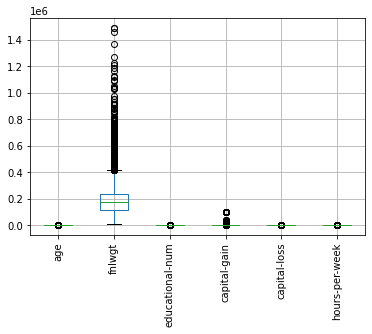

In [ ]:
df_train.boxplot(column=columnsOutliers,rot=90)

In [ ]:
col =columnsOutliers
for c in col:
  print("\n",c)
  IQ = df_describe[c].loc["75%"]-df_describe[c].loc["25%"]
  print("IQ",IQ)
  box_median = df_describe[c].loc["50%"]
  box_left = df_describe[c].loc["25%"] - 1.5*IQ if (df_describe[c].loc["25%"] - 1.5*IQ < df_describe[c].loc["min"] ) else df_describe[c].loc["min"]
  box_right = df_describe[c].loc["75%"] + 1.5*IQ if (df_describe[c].loc["75%"] + 1.5*IQ < df_describe[c].loc["max"] ) else df_describe[c].loc["max"]
  percentage = ((df_train[c] >box_right) | (df_train[c] <box_left)).mean()*100
  print("percentage",percentage)
  if(percentage<1):
    inx = (df_train[(df_train[c] >box_right) | (df_train[c] <box_left)].index).to_list()
    print("index before ",inx)
    print(df_train.loc[inx][c])
    df_train.loc[inx,c] = box_median
    print(box_median)
    inx = df_train[(df_train[c] >box_right) | (df_train[c] <box_left)].index.to_list()
    print("index after ",inx)
    print(df_train.loc[inx][c])


 age
IQ 20.0
percentage 0.4390654503264554
index before  [99, 414, 514, 765, 1313, 1413, 1525, 1943, 2027, 2200, 2398, 2404, 2650, 2805, 2872, 3133, 3547, 3893, 4278, 4412, 5019, 5410, 5484, 5520, 5578, 5730, 5954, 6074, 6611, 6967, 6991, 7684, 8372, 8411, 8929, 9330, 9572, 10026, 10471, 10641, 11280, 11403, 11741, 11820, 11947, 12052, 12344, 12397, 12551, 12588, 12937, 13028, 13039, 13118, 13575, 13865, 13942, 14152, 14184, 14192, 14575, 14686, 14767, 14842, 15351, 15630, 16387, 16397, 16473, 17061, 17173, 17496, 18014, 18049, 18098, 18423, 18685, 19276, 19320, 19465, 19482, 19713, 19909, 20270, 20277, 20327, 20383, 20431, 20460, 20488, 20779, 20935, 20971, 21247, 21804, 21910, 22026, 22351, 22446, 22464, 22644, 22786, 22845, 23291, 23676, 23764, 24076, 24082, 24617, 24953, 25421, 25644, 25652, 26165, 26247, 26378, 26425, 26687, 26777, 26856, 26870, 27195, 27222, 27237, 27919, 28328, 28362, 28934, 29167, 29277, 29298, 30092, 30112, 30296, 30548, 30682, 30847, 30886, 31393, 31481, 316

It seems that age only has outliers so we removed it and others has a high percentage so they seems not outliers

In [ ]:
df_train

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,native-country_United-States,native-country_Mexico,native-country_Philippines,...,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Female,gender_Male
0,67,366425,16,99999,0,60,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1,17,244602,8,0,0,15,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
2,31,174201,13,0,0,40,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,58,110199,4,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,25,149248,10,0,0,40,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,1,0,0,...,0,0,0,0,0,0,0,1,0,1
43953,19,116562,9,0,0,40,0,1,0,0,...,1,0,0,0,0,0,0,1,1,0
43954,30,197947,10,0,0,58,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
43955,46,97883,13,0,0,35,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split


In [ ]:
#scaler = StandardScaler()

In [ ]:
# df_train[columnsOutliers] = scaler.fit_transform(df_train[columnsOutliers])
# df_train[columnsOutliers].describe()

In [ ]:
# X_train = df_train.drop('income_>50K',axis=1)
# y_train = df_train['income_>50K']
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

So there are not even weight so we shouldn't use the accuracy to compare between the different k valuesa nd use the F1_score

In [ ]:
# from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import f1_score
# import matplotlib.pyplot as plt
# import seaborn as sns

In [ ]:
# test_F1Rates_forClass0 = []
# test_F1Rates_forClass1 = []


# for k in range(1,5):
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(X_train,y_train)

#     y_pred_test = knn_model.predict(X_test)
#     # report = classification_report(y_test,y_pred_test)

#     # print(type(report))
#     # df_classification_report = pd.DataFrame(report)
#   #  df_classification_report.head()
#     f1_scores = f1_score(y_test, y_pred_test, average=None) #f1_score(y_true, y_pred, average=None)


#    # test_error = 1 - accuracy_score(y_test,y_pred_test)
#     test_F1Rates_forClass1.append( f1_scores[1])
#     test_F1Rates_forClass0.append( f1_scores[0])

In [ ]:
# plt.figure(figsize=(10,6),dpi=200)
# plt.plot(range(1,30),test_F1Rates_forClass1,label='F1 for class 1')
# plt.plot(range(1,30),test_F1Rates_forClass0,label='F1 for class 0')

# plt.legend()
# plt.ylabel('Error Rate')
# plt.xlabel("K Value")

*SVM*

In [ ]:
X = df_train.drop('income_>50K',axis=1)
y = df_train['income_>50K']
df_train.shape

(43957, 55)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train);
X_train=scaler.transform(X_train);
X_test=scaler.transform(X_test);

In [ ]:
model=SVC(kernel='linear');
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8505459508644222
0.7514318442153494
0.5985401459854015
0.6663280853224988


In [ ]:
model2=SVC(kernel="rbf",C=1)
model2.fit(X_train,y_train)
y_pred_m2 = model2.predict(X_test)
print(accuracy_score(y_test,y_pred_m2))
print(precision_score(y_test,y_pred_m2))
print(recall_score(y_test,y_pred_m2))
print(f1_score(y_test,y_pred_m2))

0.8489535941765242
0.7571428571428571
0.5802919708029197
0.6570247933884298


In [ ]:
model4=SVC(kernel="poly",C=1)
model4.fit(X_train,y_train)
y_pred_m4 = model4.predict(X_test)
print(accuracy_score(y_test,y_pred_m4))
print(precision_score(y_test,y_pred_m4))
print(recall_score(y_test,y_pred_m4))
print(f1_score(y_test,y_pred_m4))

0.8343949044585988
0.728287841191067
0.5355839416058394
0.6172450052576236


In [ ]:
model3=SVC(kernel="sigmoid")
model3.fit(X_train,y_train)
y_pred_m3 = model3.predict(X_test)
print(accuracy_score(y_test,y_pred_m3))
print(precision_score(y_test,y_pred_m3))
print(recall_score(y_test,y_pred_m3))
print(f1_score(y_test,y_pred_m3))

0.7891264786169245
0.5835806132542037
0.5383211678832117
0.5600379686758424


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


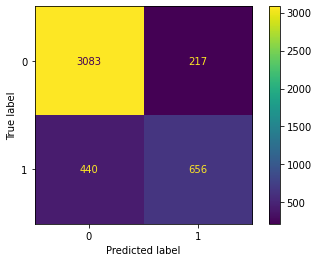

In [ ]:
plot_confusion_matrix(model,X_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


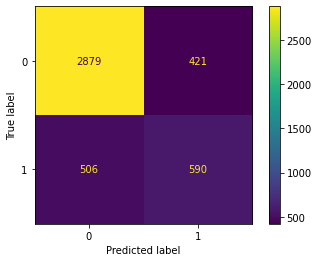

In [ ]:
plot_confusion_matrix(model3,X_test,y_test)